# PHASE 2 PROJECT: Movie Studio Analysis

## INTRODUCTION
### BUSINESS PROBLEM 
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

### OBJECTIVES
In this project we will be looking to give out a clear picture of what the movie industry is like with regards to profits, popularity of genres and when the best season to release a movie is so as to maximize profits.
To acomplish this we will be using concepts learnt in SQL, Statistical methods and even Hypothesis testing

## DATA UNDERSTANDING
For this project we will be having 6 data sources:
1. `bom.movie_gross.csv`: This is a file that contains information regarding a movies name, both domestic and foreign gross amount and the year it was released

2. `im.db`:This is a zipped folder that contains a database called `im` which contains data regarding a movie. This data includes what category it falls under, the direcctor, actors involved, movie ratings, running time and many more

3. `rt.movie_info.tsv`: This file has information the movie rating for theatrical releases e.g. 'R' 'PG 13' e.t.c. it also tells more about the movie like genre, director, theatrical release date, dvd release date, runtime, box office gross and studio

4. `rt.reviews.tsv`: This is a list of reviews from reviewers and and the ratings they gave, it also gives info on who published the review

5. `tmdb.movies.csv`: Here we have genre ids, movie titles, language the movie is in, its popularity, release date,vote count and the average vote

6. `tn.movie_budgets.csv`: This file contains a movies production budget, domestic gross and worlwide gross

## DATA PREPARATION

Now we want to take a closer look at the data sources above

In [246]:
#We start by importing the relevant libraries that we would use to explore the data sources and come to a conclussion
import pandas as pd
import sqlite3 
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import io
import ast
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine

Now we want to load the data sources below

In [247]:
mg = pd.read_csv(r"zippedData\bom.movie_gross.csv.gz")
mg

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [248]:
# Loading 'rt.movie_info.tsv'
mi = pd.read_csv(r"zippedData\rt.movie_info.tsv.gz",  sep = '\t', encoding='ISO-8859-1')
mi

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [249]:
# Load and view `rt.reviews.tsv`
mr = pd.read_csv(r"zippedData\rt.reviews.tsv.gz", sep = '\t', encoding='ISO-8859-1')
mr

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [250]:
#Load 'tn.movie_budgets.csv'
mb = pd.read_csv(r"zippedData\tn.movie_budgets.csv.gz")
mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [251]:
re = pd.read_csv(r"zippedData\tmdb.movies.csv.gz",index_col=0)
re

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [252]:
#Here we want to unzip the zipped database file
zipped_db = r"zippedData\im.db.zip"
db_file = r"zippedData\im.db"

with zipfile.ZipFile(zipped_db, 'r') as zip_ref:
    if db_file in zip_ref.namelist():
        with zip_ref.open(db_file) as db:
            db_buffer = io.BytesIO(db_file.read())

mdb = sqlite3.connect(db_file).cursor()
mdb.execute("SELECT name FROM sqlite_master WHERE type = 'table';").fetchall()#This querry will display tables from the database 'im'

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',),
 ('existing_table',),
 ('mb',)]

In [253]:
conn=sqlite3.connect(db_file)

Now for the next section we want to get a closer look at all the tables from the database we have loaded above

In [254]:
mdb.execute(f"PRAGMA table_info('movie_basics');").fetchall()

[(0, 'movie_id', 'TEXT', 0, None, 0),
 (1, 'primary_title', 'TEXT', 0, None, 0),
 (2, 'original_title', 'TEXT', 0, None, 0),
 (3, 'start_year', 'INTEGER', 0, None, 0),
 (4, 'runtime_minutes', 'REAL', 0, None, 0),
 (5, 'genres', 'TEXT', 0, None, 0)]

In [255]:
# To convert the movie_basics table to pandas dataframe
movie_basics=pd.read_sql(f"SELECT * FROM movie_basics;",conn)

In [256]:
mdb.execute(f"PRAGMA table_info('directors');").fetchall()

[(0, 'movie_id', 'TEXT', 0, None, 0), (1, 'person_id', 'TEXT', 0, None, 0)]

In [257]:
# To convert the directors table to pandas dataframe
directors=pd.read_sql(f"SELECT * FROM directors;",conn)

In [258]:
mdb.execute(f"PRAGMA table_info('known_for');").fetchall()

[(0, 'person_id', 'TEXT', 0, None, 0), (1, 'movie_id', 'TEXT', 0, None, 0)]

In [259]:
# To convert known_for table to pandas dataframe
known_for=pd.read_sql(f"SELECT * FROM known_for;",conn)

In [261]:
mdb.execute(f"PRAGMA table_info('movie_akas');").fetchall()

[(0, 'movie_id', 'TEXT', 0, None, 0),
 (1, 'ordering', 'INTEGER', 0, None, 0),
 (2, 'title', 'TEXT', 0, None, 0),
 (3, 'region', 'TEXT', 0, None, 0),
 (4, 'language', 'TEXT', 0, None, 0),
 (5, 'types', 'TEXT', 0, None, 0),
 (6, 'attributes', 'TEXT', 0, None, 0),
 (7, 'is_original_title', 'REAL', 0, None, 0)]

In [262]:
# To convert movie_akas table to pandas dataframe
movie_akas=pd.read_sql(f"SELECT * FROM movie_akas;",conn)

In [263]:
mdb.execute(f"PRAGMA table_info('movie_ratings');").fetchall()

[(0, 'movie_id', 'TEXT', 0, None, 0),
 (1, 'averagerating', 'REAL', 0, None, 0),
 (2, 'numvotes', 'INTEGER', 0, None, 0)]

In [264]:
# To convert movie_ratings table to pandas dataframe
movie_ratings=pd.read_sql(f"SELECT * FROM movie_ratings;",conn)

In [265]:
mdb.execute(f"PRAGMA table_info('persons');").fetchall()

[(0, 'person_id', 'TEXT', 0, None, 0),
 (1, 'primary_name', 'TEXT', 0, None, 0),
 (2, 'birth_year', 'REAL', 0, None, 0),
 (3, 'death_year', 'REAL', 0, None, 0),
 (4, 'primary_profession', 'TEXT', 0, None, 0)]

In [266]:
# To convert persons table to pandas dataframe
persons=pd.read_sql(f"SELECT * FROM persons;",conn)

In [267]:
mdb.execute(f"PRAGMA table_info('principals');").fetchall()

[(0, 'movie_id', 'TEXT', 0, None, 0),
 (1, 'ordering', 'INTEGER', 0, None, 0),
 (2, 'person_id', 'TEXT', 0, None, 0),
 (3, 'category', 'TEXT', 0, None, 0),
 (4, 'job', 'TEXT', 0, None, 0),
 (5, 'characters', 'TEXT', 0, None, 0)]

In [268]:
# To convert principals table to pandas dataframe
principals=pd.read_sql(f"SELECT * FROM principals;",conn)

In [270]:
mdb.execute(f"PRAGMA table_info('writers');").fetchall()

[(0, 'movie_id', 'TEXT', 0, None, 0), (1, 'person_id', 'TEXT', 0, None, 0)]

In [271]:
# To convert writers table to pandas dataframe
writers=pd.read_sql(f"SELECT * FROM writers;",conn)

This will now make it easier to find the columns that we would be using to connect two or more of the tables together. Now that we've seen what they contain and the data types of the columns. Now the task ahead will be to try and find a way of matching the database extracted to `mdb` with the other files in order to be able to analyse the data and come out insights that could help the company make the decision on what kind of movie studio they want to open.

So the best way to look at the kind of data that would be needed would be trying to answer the following questions
1. What is the total profit made by movies depending on the genres?
2. What is the most popular movie genre among customers?
3. when is the most appropriate time to release a movie in order to make the most amount of profit?

**1. What is the total profit made by movies depending on genres?**

For this question we willl want to create a column in the movies budget called `Gross Profit`. This column wil be consisting of total gross profit = domestic gross + international gross and then we will use that get the gross profit which will be calculated by taking total gros profit and subtracting from production budget. This will help us know what if there was actually a true profit made.

In [272]:
#we know that the data here are in type object so we start by converting the required columns into type int
mb['production_budget'] = pd.to_numeric(mb['production_budget'].replace({r'\$': '', r',': ''}, regex=True), errors='coerce')
mb['domestic_gross'] = pd.to_numeric(mb['domestic_gross'].replace({r'\$': '', r',': ''}, regex=True), errors='coerce')
mb['worldwide_gross'] = pd.to_numeric(mb['worldwide_gross'].replace({r'\$': '', r',': ''}, regex=True), errors='coerce')

In [273]:
#verifying that they have converted into type int
mb.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [274]:
# Now let's create a new column 'gross_profit and input the relevant data into it
mb['grossprofit'] = (mb['domestic_gross'] + mb['worldwide_gross']) - mb['production_budget']
mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,grossprofit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,282977
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-2324
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [275]:
#Here we are just verifying to ensure that there is no missing data in the dataset after creating the new column
mb.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
grossprofit          0
dtype: int64

Now that we have created a new column 'gross_profit we can visibly see that there have been movies with losses and movies with profit.
The next step is now to find a way of getting the genres of each and every movie so as to make grouping them into genres a lot easier. The table `movie_basics` in the database will be the best way seeing as it has the genres labled out. So we will want to join the `movie_basics` table with the `mb` dataframe created above

In [276]:
movie_basics.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [277]:
movie_basics['genres'] = movie_basics['genres'].apply(lambda x: x.split(',') if isinstance(x, str) and x != 'None' else [])
movie_basics_expanded = movie_basics.explode('genres')
movie_basics_expanded['genres'] = movie_basics_expanded['genres'].str.strip().str.lower()
movie_basics_expanded = movie_basics_expanded.reset_index(drop=True)
movie_basics_expanded.head(15)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,drama
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,drama
6,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,comedy
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,drama
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,comedy
9,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,drama


In [278]:
# Rename the column movie to title
mb = mb.rename(columns={'movie':'title'})
mb

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,grossprofit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,282977
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-2324
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [279]:
mbd = pd.merge(mb,re, on='title', how='inner')
mbd

,id_x,release_date_x,title,production_budget,domestic_gross,worldwide_gross,grossprofit,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2426949682,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,584969504,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,49,"Sep 1, 2015",Exeter,25000,0,489792,464792,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,4.7,121
2381,51,"Apr 21, 2015",Ten,25000,0,0,-25000,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,5.4,5
2382,54,"Dec 31, 2014",Dry Spell,22000,0,0,-22000,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,6.0,1
2383,56,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,-20000,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,3.9,19


In [280]:
mbd = mbd.drop(columns=['release_date_x','original_language', 'original_title', 'release_date_y', 'id_x', 'genre_ids', 'id_y'], axis = 0, errors = 'ignore')
mbd.head(15)

,title,production_budget,domestic_gross,worldwide_gross,grossprofit,popularity,vote_average,vote_count
0,Avatar,425000000,760507625,2776345279,3111852904,26.526,7.4,18676
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,30.579,6.4,8571
2,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,44.383,7.3,13457
3,Avengers: Infinity War,300000000,678815482,2048134200,2426949682,80.773,8.3,13948
4,Justice League,300000000,229024295,655945209,584969504,34.953,6.2,7510
5,Justice League,300000000,229024295,655945209,584969504,34.953,6.2,7510
6,Spectre,300000000,200074175,879620923,779695098,30.318,6.4,6719
7,Spectre,300000000,200074175,879620923,779695098,30.318,6.4,6719
8,The Dark Knight Rises,275000000,448139099,1084439099,1257578198,26.220,7.7,13933
9,Solo: A Star Wars Story,275000000,213767512,393151347,331918859,29.502,6.6,3838


In [281]:
movie_basics_expanded = movie_basics_expanded.rename(columns={'primary_title':'title'})
movie_total = pd.merge(mbd, movie_basics_expanded, on = 'title', how='inner')
movie_total = movie_total.drop(columns=['production_budget', 'domestic_gross','worldwide_gross','movie_id'], axis = 1)
movie_total.head(15)

,title,grossprofit,popularity,vote_average,vote_count,original_title,start_year,runtime_minutes,genres
0,Avatar,3111852904,26.526,7.4,18676,Abatâ,2011,93.0,horror
1,Pirates of the Caribbean: On Stranger Tides,876127750,30.579,6.4,8571,Pirates of the Caribbean: On Stranger Tides,2011,136.0,action
2,Pirates of the Caribbean: On Stranger Tides,876127750,30.579,6.4,8571,Pirates of the Caribbean: On Stranger Tides,2011,136.0,adventure
3,Pirates of the Caribbean: On Stranger Tides,876127750,30.579,6.4,8571,Pirates of the Caribbean: On Stranger Tides,2011,136.0,fantasy
4,Avengers: Age of Ultron,1531419831,44.383,7.3,13457,Avengers: Age of Ultron,2015,141.0,action
5,Avengers: Age of Ultron,1531419831,44.383,7.3,13457,Avengers: Age of Ultron,2015,141.0,adventure
6,Avengers: Age of Ultron,1531419831,44.383,7.3,13457,Avengers: Age of Ultron,2015,141.0,sci-fi
7,Avengers: Infinity War,2426949682,80.773,8.3,13948,Avengers: Infinity War,2018,149.0,action
8,Avengers: Infinity War,2426949682,80.773,8.3,13948,Avengers: Infinity War,2018,149.0,adventure
9,Avengers: Infinity War,2426949682,80.773,8.3,13948,Avengers: Infinity War,2018,149.0,sci-fi


In [282]:
profit_by_genres = movie_total.groupby('genres').agg(total_grossprofit=pd.NamedAgg(column='grossprofit', aggfunc='sum'), avg_popularity=pd.NamedAgg(column='popularity', aggfunc='mean'),avg_vote_average=pd.NamedAgg(column='vote_average', aggfunc='mean'), total_vote_count=pd.NamedAgg(column='vote_count', aggfunc='sum'))
profit_by_genres

,total_grossprofit,avg_popularity,avg_vote_average,total_vote_count
genres,,,,
action,145416892272,12.811314,5.985071,1804730
adventure,162822821568,15.095244,6.225709,1687609
animation,61636527866,10.666538,6.232487,392193
biography,28998366460,8.716848,6.489634,388702
comedy,111487058098,9.517845,6.132127,1127926
crime,30612965195,9.799904,6.090359,546864
documentary,66693542526,4.741006,6.055334,426962
drama,170846486340,7.318953,6.275980,2150496
family,55466012392,7.988199,6.110487,352345


**2. What is the most popular movie genre among customers?**

Now in order to answer this we would want to look at the ratings that are given to the movies and which genres have the genral highest ratings. The best way to get this info would be to find a way to merge the movie_basics table and the movie ratings table.

In [283]:
#A quick look at movie_basics_expanded to see what the table holds
movie_basics_expanded.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,drama


In [284]:
#This is a view of the table that has the movie ratings
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [285]:
#check if there are any missing values
movie_basics_expanded.isna().sum()

movie_id               0
title                  0
original_title        21
start_year             0
runtime_minutes    39054
genres              5408
dtype: int64

In [286]:
# dropping the neccessary columns
movie_basics_expanded.dropna(subset=['original_title','runtime_minutes','genres'],inplace=True)

In [287]:
#check for missing values after droping the columns in movie_basics_expanded
movie_basics_expanded.isna().sum()

movie_id           0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [288]:
#Cheeck for missing values in movie_ratings 
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [289]:
#combining the movie_basics_expanded with the movie_ratings to have one cleat dataframe with both
mbr=pd.merge(movie_basics_expanded,movie_ratings, on='movie_id', how='inner')
mbr.head(15)

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,action,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,crime,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,drama,7.0,77
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,biography,7.2,43
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,drama,7.2,43
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,drama,6.9,4517
6,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,comedy,6.5,119
7,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,drama,6.5,119
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,fantasy,6.5,119
9,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,adventure,8.1,263


In [291]:
#check for any duplicate values
mbr.duplicated().sum()

0

In [294]:
mbr_unique_genres= mbr['genres'].unique()
for genre in mbr_unique_genres:
    mbr[genre] = mbr['genres'].apply(lambda x: 1 if genre in x else 0)
                                     
mbr.head(15)

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,action,crime,...,war,music,sport,western,musical,news,reality-tv,game-show,adult,short
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,action,7.0,77,1,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,crime,7.0,77,0,1,...,0,0,0,0,0,0,0,0,0,0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,drama,7.0,77,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,biography,7.2,43,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,drama,7.2,43,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,drama,6.9,4517,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,comedy,6.5,119,0,0,...,0,0,0,0,0,0,0,0,0,0
7,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,drama,6.5,119,0,0,...,0,0,0,0,0,0,0,0,0,0
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,fantasy,6.5,119,0,0,...,0,0,0,0,0,0,0,0,0,0
9,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,adventure,8.1,263,0,0,...,0,0,0,0,0,0,0,0,0,0


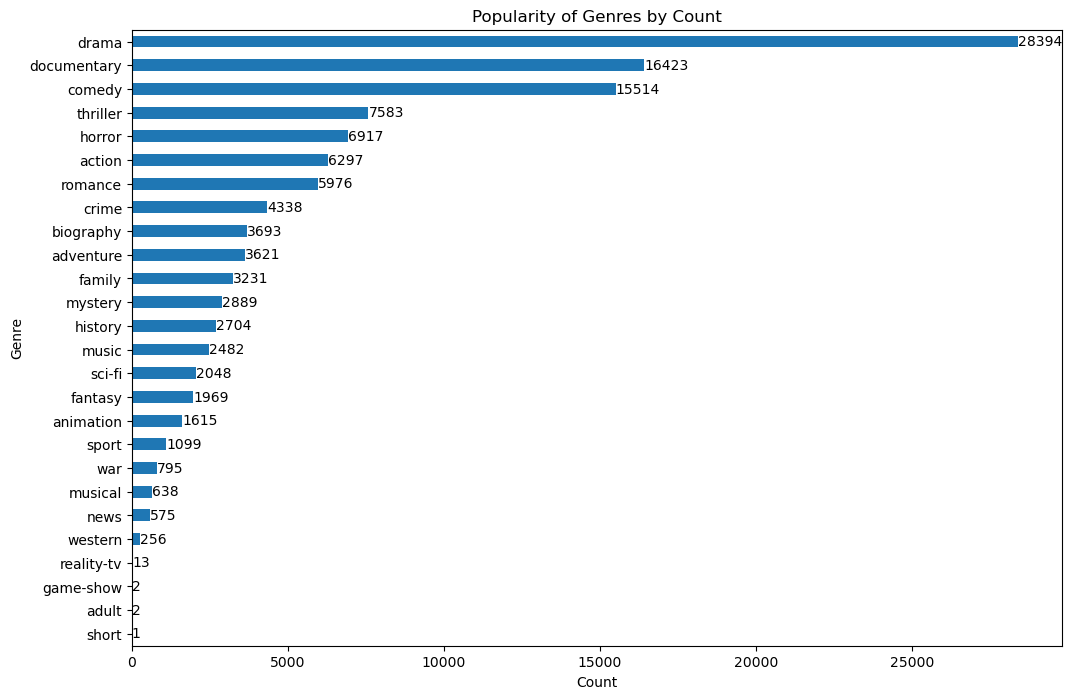

In [296]:
#Now let us crate a bargrph that shows all this information and sort with the most popular by count
genre_counts = mbr[mbr_unique_genres].sum()
plt.figure(figsize=(12, 8))
ax = genre_counts.sort_values().plot(kind='barh')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2, int(width), 
            ha='left', va='center', color='black')

plt.title('Popularity of Genres by Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show();

From the graph above we can note the following:
* There is no other genre more popular than drama due to its large following
* The top 5 genres with a reasonable popularity count are : Drama, Documentary, Comedy, Thriller and horror while only the first three have a popularity count of over 15k 

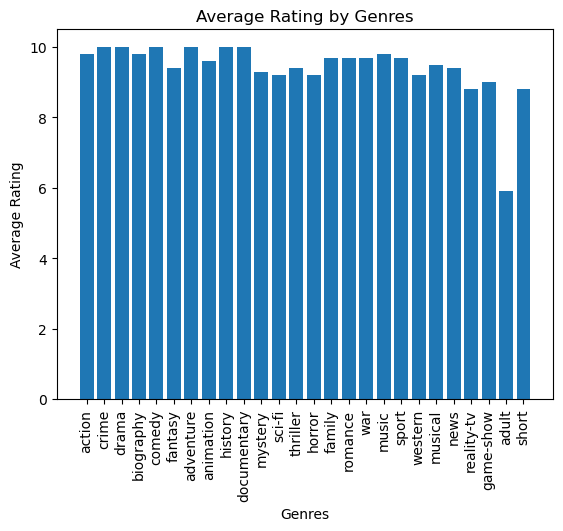

In [298]:
#Here we are going to plot a simple graph of the movie genres and their average ratings
plt.bar(mbr['genres'], mbr['averagerating'])
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genres')
plt.xticks(rotation=90)
plt.show()

### 3.When is the most appropriate time to release a movie in order to make the most amount of profit?                                                

##### In order to get this, we'll have to look at the movie budgets table.


In [300]:
mb.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,grossprofit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


In [301]:
# converting relevant rows from object to integer data type
mb[mb.columns[3:6]]= mb[mb.columns[3:6]].replace('[\$,]', '' ,regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\User\AppData\Local\Temp\ipykernel_19388\4004669862.py:2: SyntaxWarning: invalid escape sequence '\$'
  mb[mb.columns[3:6]]= mb[mb.columns[3:6]].replace('[\$,]', '' ,regex=True).astype(float)


In [302]:
#changing the release_date column to date_time data type.
mb["release_date"]=mb["release_date"].astype('datetime64[ns]')

Here, we create a new column 'wrldwide_profit' that gives the worldwide profits of each movie.

In [303]:
# Creating a new column 'worldwide_profit' to display profits.
mb['worldwide_profit']=mb['worldwide_gross']-mb['production_budget']

In [304]:
mb.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,grossprofit,worldwide_profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3111852904,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,876127750,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-157475300,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1531419831,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1619903129,9.997217e+08


In [305]:
# Creating a column of the months only
mb["month"]=mb['release_date'].dt.month

In [306]:
mb.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,grossprofit,worldwide_profit,month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3111852904,2.351345e+09,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,876127750,6.350639e+08,5
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-157475300,-2.002376e+08,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1531419831,1.072414e+09,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1619903129,9.997217e+08,12


we then group by months to find the average profits of each month over the years.

In [309]:
# Grouping the profits by months and displaying the average gross profits of each month.
profits=mb.groupby('month')['worldwide_profit'].mean()
profits

month
1     2.572033e+07
2     4.349811e+07
3     4.985129e+07
4     3.611743e+07
5     1.151328e+08
6     9.942391e+07
7     9.841746e+07
8     3.542232e+07
9     2.488078e+07
10    2.907190e+07
11    9.314157e+07
12    6.844157e+07
Name: worldwide_profit, dtype: float64

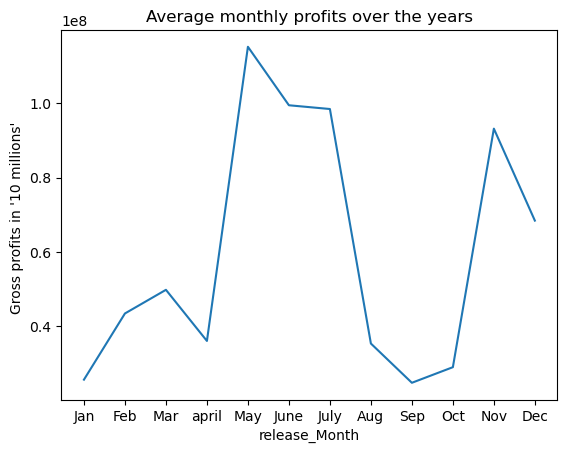

In [310]:
# plotting a line-graph of average profits of each month over the years

months=["Jan","Feb","Mar","april","May","June","July","Aug","Sep","Oct","Nov","Dec"]
fig,ax=plt.subplots()
ax.plot(months,profits
       )
ax.set_title("Average monthly profits over the years")
ax.set_xlabel("release_Month")
ax.set_ylabel("Gross profits in '10 millions' ");


#### From the above graph we can deduce that;
* There is high growth in interest in between the month of April and May and the same for October to November
* Movies released in the months May,June,July and November have yielded the most gross profits.
* Movies released in January,April,Aug,September and October have yielded the least profits.